# Chapter 6 Tree-based methods
## 6.1 Simple trees

In [48]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier


In [6]:
# Load data
DATA_PATH = "../data/raw/data_ml.csv"
data_ml = pd.read_csv(DATA_PATH)
data_ml['date'] = pd.to_datetime(data_ml['date'])
data_ml

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.99,0.99,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112
283376,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122
283377,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091
283378,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.99,0.99,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040


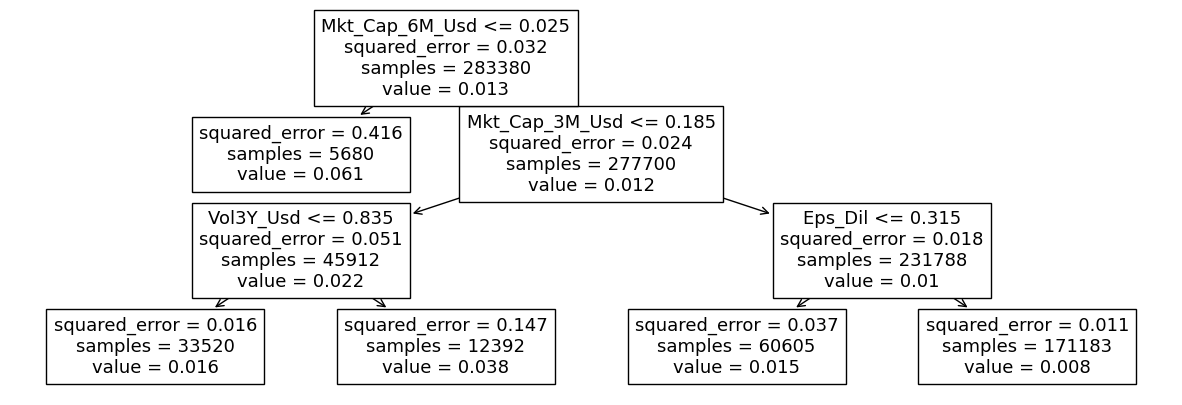

In [9]:
X = data_ml.iloc[:,3:95] # recall features/predictors, full sample
y = data_ml['R1M_Usd'] # recall label/Dependent variable, full sample

fit_tree = tree.DecisionTreeRegressor( # Definining the model
  min_samples_split = 8000, # Min nb of obs required to continue splitting 
  max_depth = 3, # Maximum depth (i.e. tree levels)
  ccp_alpha=0.000001, # complexity parameters
  min_samples_leaf =3500 # Min nb of obs required in each terminal node (leaf)
        )
fit_tree.fit(X, y) # Fitting the model
fig, ax = plt.subplots(figsize=(15, 5))
tree.plot_tree(fit_tree,feature_names=X.columns.values, ax=ax) # Plot the tree
plt.show()

In [12]:
y_pred=fit_tree.predict(X.iloc[0:6,:])   # Test (prediction) on the first six instances of the sample
y_pred

array([0.01453468, 0.01453468, 0.01453468, 0.03834095, 0.03834095,
       0.03834095])

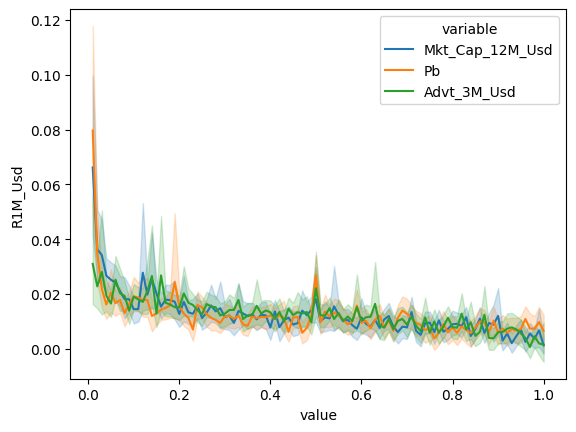

In [14]:
unpivoted_data_ml = pd.melt(data_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Pb','Advt_3M_Usd']], id_vars='R1M_Usd') # selecting and putting in vector
sns.lineplot(data = unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable'); # Plot from seaborn

In [34]:
features = X.columns.values.tolist()
separation_date = pd.to_datetime('2013-01-01')
training_sample = data_ml.loc[data_ml['date'] < separation_date]
testing_sample = data_ml.loc[data_ml['date'] > separation_date]

y_train = training_sample['R1M_Usd'].values # regression target
X_train = training_sample[features].values

X_test = testing_sample[features].values
y_test = testing_sample['R1M_Usd'].values

fit_tree2 = tree.DecisionTreeRegressor( # Defining the model
  min_samples_split = 4000, # Min nb of obs required to continue splitting
  max_depth = 5, # Maximum depth (i.e. tree levels)
  ccp_alpha=0.0001, # complexity parameters
  min_samples_leaf =1500 # Min nb of obs required in each terminal node (leaf)
        )
fit_tree2 = fit_tree2.fit(X_train, y_train) # Fitting the model

mse = np.mean((fit_tree2.predict(X_test) - y_test)**2)
print(f'MSE: {mse}')

hitratio = np.mean(fit_tree2.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hitratio}')

MSE: 0.03413808354246756
Hit Ratio: 0.558728361106617


## 6.2 Random forests

In [45]:
fit_RF = RandomForestRegressor(
    n_estimators = 40, # Nb of random trees
    criterion ='squared_error', # function to measure the quality of a split
    min_samples_split= 250, # Minimum size of terminal cluster
    bootstrap=True, # replacement
    max_features=30, # Nb of predictive variables for each tree
    max_samples=10000 # Size of (random) sample for each tree
)

fit_RF.fit(X_train, y_train) # Fitting the model
fit_RF.predict(pd.DataFrame(X_test).iloc[0:5,]) # Prediction over the first 5 test instances 

mse = mean_squared_error(y_test, fit_RF.predict(X_test))
hitratio = np.mean(fit_RF.predict(X_test) * y_test > 0)

print(f'MSE: {mse}')
print(f'Hit Ratio: {hitratio}')

MSE: 0.03411878099598979
Hit Ratio: 0.5441676104190261


In [43]:
# Classification labels: up (1) if return > 0 else 0
y_c_train = (y_train > 0).astype(int)
y_c_test = (y_test > 0).astype(int)

fit_RF_C = RandomForestClassifier( 
n_estimators = 40, # Nb of random trees
criterion ='gini', # function to measure the quality of a split
min_samples_split= 250, # Minimum size of terminal cluster
bootstrap=True, # replacement
max_features=30, # Nb of predictive variables for each tree
max_samples=30000 # Size of (random) sample for each tree
)
fit_RF_C=fit_RF_C.fit(X_train, y_c_train) # Fitting the model

hitratio = np.mean(fit_RF_C.predict(X_test) == y_c_test)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.5550997295860587


## 6.3 Boosted trees: Adaboost

In [47]:
fit_adaboost_C = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth=3), # depth of the tree
        n_estimators=3) # Number of trees 
fit_adaboost_C.fit(X_train, y_c_train) # Fitting the model

,estimator,DecisionTreeC...r(max_depth=3)
,n_estimators,3
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [49]:
hitratio=accuracy_score(y_c_test, fit_adaboost_C.predict(X_test)) # Hitratio
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.558728361106617
